In [22]:
import pandas as pd

# 타이타닉 데이터셋 URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# 데이터 불러오기
df = pd.read_csv(url)

# 데이터 확인
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
#pip install --upgrade scipy

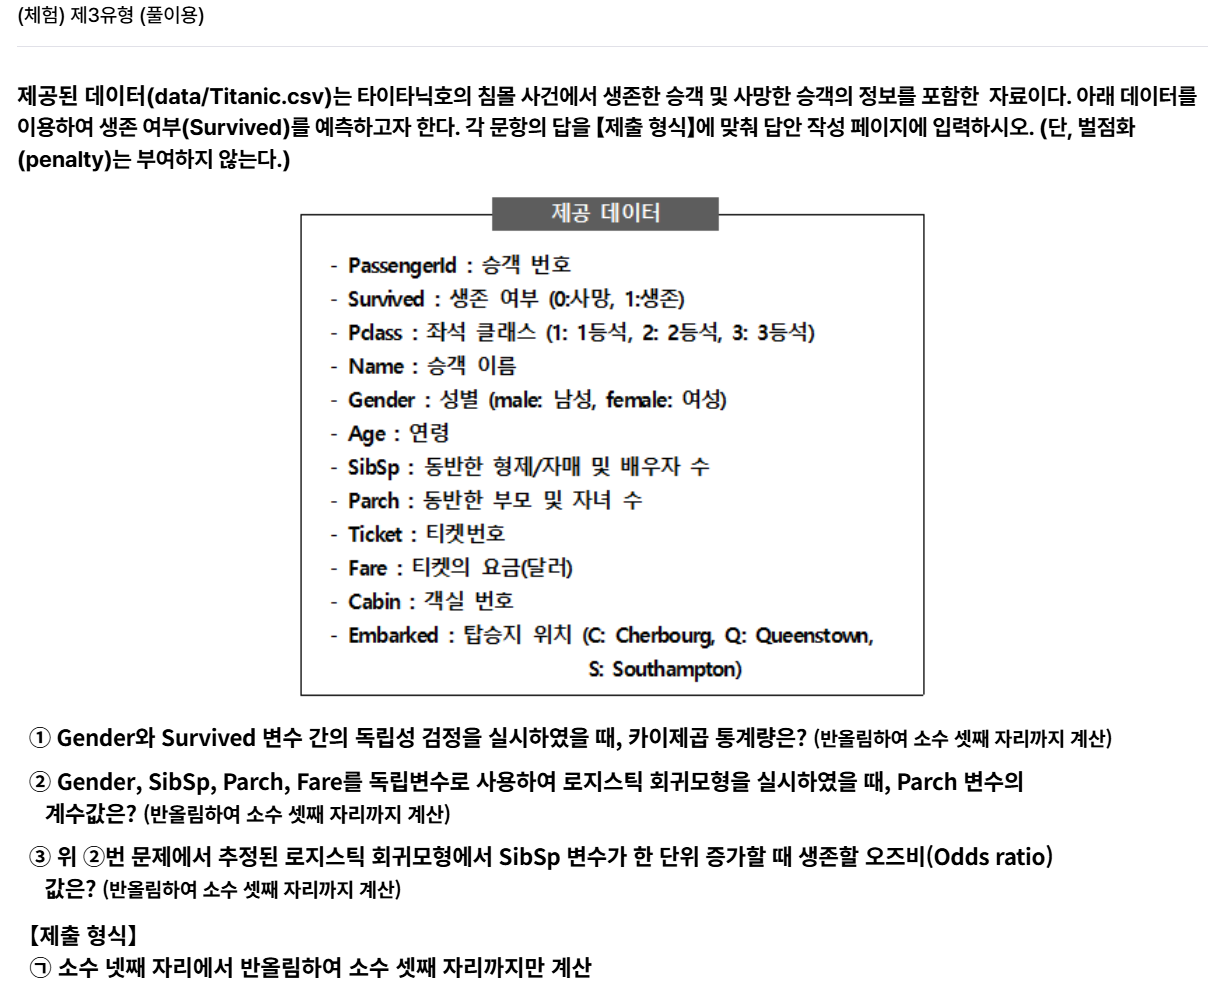

### -----------------------------------------------------------------------------------------------------------------------------------------------

# [카이제곱 통계량]

## 범위 : 0 ~ 무한대
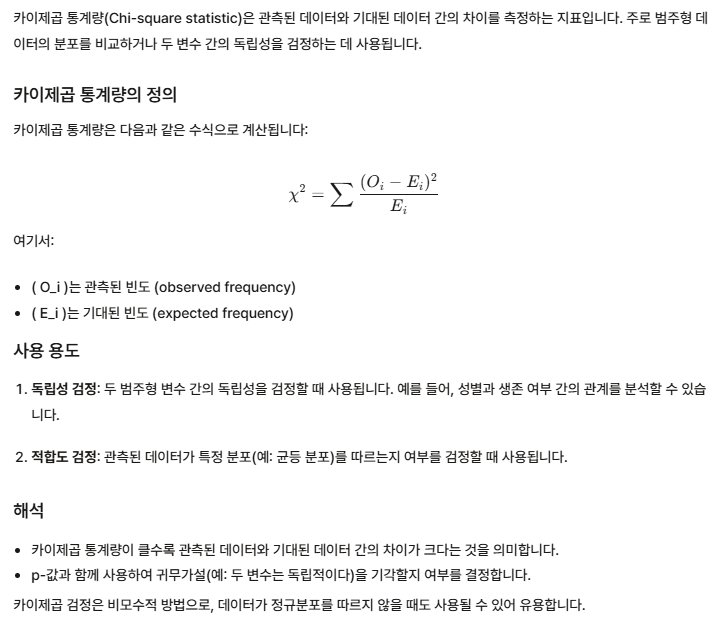

In [5]:
# 두 변수 카이제곱 통계량

from scipy.stats import chi2_contingency #교차표 = contigency 표

table = pd.crosstab(df['Sex'], df['Survived']) # 교차표 만드는게 crosstab
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [7]:
# statistics = 검정통계량
# p = p value
# df = degree of freedom 자유도
# expected 예상빈도 테이블
statistics, p, df, expected = chi2_contingency(table) 
statistics

260.71702016732104

In [8]:
round(statistics, 3)

260.717

## 카이제곱 통계량 요약
### crosstab으로 테이블을 만들어서 chi2_contingency 에 넣으면 되는데, 변수 4개 중 첫번째가 검정통계량

In [ ]:
from scipy.stats import chi2_contingency    # 범주형 데이터 카이제곱 통계량
from scipy.stats import ttest_1samp         # t검정 단일표본
from scipy.stats import ttest_ind           # t검정 두 변수 독립표본
from scipy.stats import ttest_rel           # t검정 대응표본
from scipy.stats import chisquare           # 수치형 데이터 카이제곱 통계량

1. chi2_contingency
- statistics: 카이제곱 통계량
- p: p-값
- df: 자유도 (degrees of freedom)
- expected: 기대 빈도 (expected frequencies) 배열
2. ttest_1samp
- statistic: t 통계량
- pvalue: p-값
- 용도: 단일 표본 t-검정. 주어진 표본의 평균이 특정 값과 다른지를 검정합니다.
3. ttest_ind
- statistic: t 통계량
- pvalue: p-값
- 용도: 두 독립 표본 간의 평균 차이를 검정합니다.
4. ttest_rel
- statistic: t 통계량
- pvalue: p-값
- 용도: 두 관련 표본(예: 같은 집단의 사전/사후 데이터) 간의 평균 차이를 검정합니다.
5. chisquare
- statistic: 카이제곱 통계량
- pvalue: p-값
- 용도: 수치형 데이터의 적합도 검정. 관측된 빈도가 주어진 기대 빈도와 얼마나 일치하는지를 검정합니다.

In [17]:
# 두 변수 카이제곱 통계량

from scipy.stats import chisquare #교차표 = contigency 표

table = pd.crosstab(df['Age'], df['Survived']) # 교차표 만드는게 crosstab
statistics, p = chisquare(table) 

statistics


array([449.77358491, 309.00689655])

In [18]:
print(chisquare(table))

Power_divergenceResult(statistic=array([449.77358491, 309.00689655]), pvalue=array([2.62209403e-50, 1.27350329e-26]))


- 값을 보고 큰 값 = 검정 통계량
- 매우 작은 값    = p-value
- 정수            = 자유도

In [24]:
import pandas as pd
from scipy.stats import pearsonr


# 피어슨 상관계수 계산
correlation, p_value = pearsonr(df['SibSp'], df['Survived'])

# 결과 출력
print(f"피어슨 상관계수: {correlation}")
print(f"p-값: {p_value}")


피어슨 상관계수: -0.035322498885735534
p-값: 0.292243928698296


# --------------------------------------------------------------------------------------------

# [로지스틱 회귀모형에서 특정 변수의 계수값 구하는 법]

In [14]:
# 정석적인 방법

from statsmodels.api import Logit
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])  # Logit 은 수치형 데이터만 가능하기 때문에, 라벨 인코딩으로 수치 변환

X = df[['Sex', 'SibSp', 'Parch', 'Fare']]
X = sm.add_constant(X)                        # 회귀분석의 절편에 해당하여 없이 절편 추가하는 기능
y = df['Survived']

model = Logit(y, X)
results = model.fit()
results.summary()                             # 다양한 값들을 볼 수 있어서 summary에서 웬만한 답 확인 가능

Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.2761
Time:                        21:13:19   Log-Likelihood:                -429.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.192e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9466      0.169      5.590      0.000       0.615       1.279
Sex           -2.6422      0.186    -14.197      0.000      -3.007      -2.277
SibSp         -0.3539      0.098     -3.604      0.000      -0.546      -0.161
Parch         -0.2007      0.112     -1.792      0.073      -0.420       0.019
Fare           0.0147      0.003      5.553      0.000       0.010       0.020
==============================================================================
"""

In [7]:
# 간단한 코드 방법

from statsmodels.api import Logit

formula = 'Survived ~ Sex + SibSp + Parch + Fare'
results = Logit.from_formula(formula, df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.482065
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 15 Nov 2024   Pseudo R-squ.:                  0.2761
Time:                        21:21:04   Log-Likelihood:                -429.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.192e-69
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9466      0.169      5.590      0.000       0.615       1.279
Sex[T.male]    -2.6422      0.186    -14.197      0.000      -3.007      -2.277
SibSp          -0.3539      0.098     -3.604      0.000      -0.546      -0.161
Parch          -0.2007      0.112     -1.792      0.073      -0.420       0.019
Fare            0.0147      0.003      5.553      0.000       0.010       0.020
===============================================================================
"""

In [3]:
results.params['Parch']

-0.2007236009559986

In [4]:
# 선형회귀에 대한 문제인 경우

from statsmodels.api import OLS

formula = 'Survived ~ Sex + SibSp + Parch + Fare'
results = OLS.from_formula(formula, df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     112.9
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           8.23e-78
Time:                        21:18:40   Log-Likelihood:                -438.42
No. Observations:                 891   AIC:                             886.8
Df Residuals:                     886   BIC:                             910.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7111      0.027     26.095      0.000       0.658       0.765
Sex[T.male]    -0.5422      0.029    -18.707      0.000      -0.599      -0.485
SibSp          -0.0475      0.013     -3.570      0.000      -0.074      -0.021
Parch          -0.0271      0.019     -1.446      0.149      -0.064       0.010
Fare            0.0018      0.000      6.598      0.000       0.001       0.002
==============================================================================
Omnibus:                       40.062   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.760
Skew:                           0.549   Prob(JB):                     1.91e-10
Kurtosis:                       3.001   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## summary 각 의미

1. Dependent Variable (종속 변수)
- 분석의 대상이 되는 변수입니다.
2. Model (모델)
- 사용한 회귀 모델의 종류를 나타냅니다. 예: OLS (Ordinary Least Squares).
3. Method (방법)
- 회귀 분석에 사용된 방법을 나타냅니다. 일반적으로 'Least Squares'입니다.
6. No. Observations (관측치 수)
- 회귀 분석에 사용된 데이터 포인트의 수입니다.
7. Df Residuals (자유도)
- 잔차의 자유도를 나타냅니다. 일반적으로 관측치 수에서 독립 변수 수를 뺀 값입니다.
8. Df Model (모델 자유도)
- 모델에서 사용된 독립 변수의 수를 나타냅니다.
9. R-squared (결정계수)
- 모델이 종속 변수를 얼마나 잘 설명하는지를 나타내는 지표입니다. 0에서 1 사이의 값으로, 1에 가까울수록 모델의 설명력이 높습니다.
10. Adj. R-squared (조정된 결정계수)
- R-squared 값을 조정하여 모델의 복잡성을 고려한 값입니다. 독립 변수가 늘어날 때 R-squared가 항상 증가하는 것을 방지합니다.
11. F-statistic
- 모델의 유의성을 검정하는 통계량입니다. 모델이 종속 변수를 설명하는 데 통계적으로 유의미한지를 판단합니다.
12. Prob (F-statistic)
- F-statistic에 대한 p-값으로, 모델의 유의성을 나타냅니다.
13. Coefficients (회귀 계수)
- 각 독립 변수의 회귀 계수를 보여줍니다. 이 값은 독립 변수가 종속 변수에 미치는 영향을 나타냅니다.
14. Standard Errors (표준 오차)
- 각 회귀 계수의 표준 오차를 나타냅니다. 계수가 얼마나 변동성이 있는지를 보여줍니다.
15. t-values
- 각 계수의 t-값으로, 계수가 0과 유의미하게 다른지를 평가합니다.
16. P>|t|
- 각 계수의 p-값으로, 귀무가설을 기각할 수 있는지를 판단합니다. 일반적으로 0.05 이하일 경우 통계적으로 유의미하다고 판단합니다.
17. Confidence Interval (신뢰 구간)
- 각 계수의 신뢰 구간을 나타내며, 회귀 계수의 불확실성을 보여줍니다.
18. Log-Likelihood (로짓 우도)
19. Deviance (잔차 이탈도)
- Log-Likelihood X (-2)

### ----------------------------------------------------------------------------------------------------------------------------------------------------

# [오즈비]

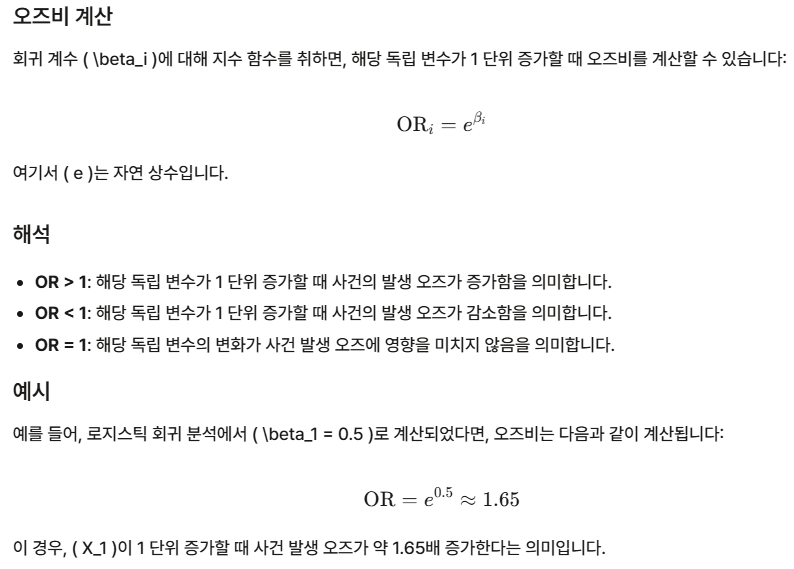

In [8]:
import numpy as np

print(np.exp(results.params['SibSp']))
print(np.exp(-0.3539))

0.7019508186162718
0.7019451583616214


### ---------------------------------------------------------------------------------------------------------

## 선형관계 가장 큰 변수 찾아 상관계수를 구하여라

In [28]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_1.csv')
df.head()


r = df.corr()['Target'].sort_values()
print(r)


v13      -0.063199
v6       -0.052110
v18      -0.049140
v8       -0.047399
v11      -0.023574
v17      -0.021494
v10      -0.005766
v14      -0.005186
v20       0.003682
v7        0.006809
v19       0.015678
v16       0.018492
v21       0.019341
v12       0.026284
v9        0.038795
v15       0.051197
v5        0.168748
v1        0.345906
v2        0.394673
v4        0.600548
v3        0.627025
Target    1.000000
Name: Target, dtype: float64


In [26]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e7_p3_1.csv')
df.head()


r = df.corr()['Target'].sort_values()[-2]
print(r)


0.6270251925517436


## Target 변수를 종속변수로 하여 다중선형회귀모델링을 진행했을 때 v2 컬럼의 회귀 계수는?

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# 다중선형회귀분석
X = df.drop('Target', axis=1)
X = sm.add_constant(X)  # 상수항 추가
y = df['Target']

model = sm.OLS(y, X).fit()
print(model.params['v2'])

6.4403013648430605


In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# 다중선형회귀분석
X = df.drop('Target', axis=1)
X = sm.add_constant(X)  # 상수항 추가
y = df['Target']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.228e+04
Date:                Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:37:47   Log-Likelihood:                -707.67
No. Observations:                1000   AIC:                             1459.
Df Residuals:                     978   BIC:                             1567.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0118      0.016      0.739      0.4

## 회귀 계수들이 가지는 p값들 중 최대 값은?

In [33]:
r = model.pvalues.max()
print(r)

0.926554598690414


## train으로 로지스틱 회귀 진행했을 경우 잔차 이탈도 (residual deviance)를 계산하라

In [35]:
# 로지스틱 회귀모형 적합 (GLM 사용) -> 이항분포시 로지스틱회귀
model2 = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# 잔차 이탈도(residual deviance) 계산
residual_deviance = model2.deviance
print(residual_deviance)


144.20562006327805


In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72.103
Date:                Sat, 16 Nov 2024   Deviance:                       144.21
Time:                        02:06:27   Pearson chi2:                     198.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4987
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0448      0.027     -1.688      0.091      -0.097       0.007
sex            1.1075      0.596      1.857      0.063      -0.061       2.277
cp             0.5500      0.227      2.421      0.015       0.105       0.995
trestbps       0.0176      0.012      1.478      0.139      -0.006       0.041
chol           0.0043      0.004      0.969      0.332      -0.004       0.013
fbs           -0.8977      0.632     -1.420      0.156      -2.137       0.341
restecg        0.3694      0.228      1.620      0.105      -0.078       0.816
thalach       -0.0470      0.011     -4.389      0.000      -0.068      -0.026
exang          0.8792      0.478      1.841      0.066      -0.057       1.815
oldpeak        0.3512      0.243      1.443      0.149      -0.126       0.828
slope          0.2034      0.406      0.501      0.616      -0.592       0.999
ca             0.9572      0.296      3.233      0.001       0.377       1.537
thal           0.3285      0.121      2.718      0.007       0.092       0.565
==============================================================================
"""

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  210
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           12
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.5014
Time:                        02:06:30   Log-Likelihood:                -72.103
converged:                       True   LL-Null:                       -144.61
Covariance Type:            nonrobust   LLR p-value:                 5.821e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0448      0.027     -1.688      0.091      -0.097       0.007
sex            1.1075      0.596      1.857      0.063      -0.061       2.277
cp             0.5500      0.227      2.421      0.015       0.105       0.995
trestbps       0.0176      0.012      1.478      0.139      -0.006       0.041
chol           0.0043      0.004      0.969      0.332      -0.004       0.013
fbs           -0.8977      0.632     -1.420      0.156      -2.137       0.341
restecg        0.3694      0.228      1.620      0.105      -0.078       0.816
thalach       -0.0470      0.011     -4.389      0.000      -0.068      -0.026
exang          0.8792      0.478      1.841      0.066      -0.057       1.815
oldpeak        0.3512      0.243      1.443      0.149      -0.126       0.828
slope          0.2034      0.406      0.501      0.616      -0.592       0.999
ca             0.9572      0.296      3.233      0.001       0.377       1.537
thal           0.3285      0.121      2.718      0.007       0.092       0.565
==============================================================================
"""

## test 데이터의 독립변수로 target 예측 후 오류율을 구하여라

In [39]:
#pred = (model.predict(test.drop(columns=['target'])) >0.5).astype('int')

from sklearn.metrics import accuracy_score

error_rate = 1 - accuracy_score(test['target'],pred)
print(error_rate)

0.1954022988505747


## age와 Cholesterol을 가지고 weight를 예측하는 선형 회귀 모델을 만들려고한다. age의 회귀 계수를 구하여라

In [40]:
import pandas as pd
import statsmodels.api as sm

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv')

X = sm.add_constant(df[['age', 'Cholesterol']]) 
model = sm.OLS(df['weight'], X)
results = model.fit()

# 전체 회귀 결과 출력
# print(results.summary())

print(results.params['age'])

-0.036101669143864944


## age가 고정일 때 Cholesterol와 weight가 선형관계에 있다는 가설을 유의수준 0.05하에 검정하라

In [41]:
H = results.pvalues['Cholesterol']

if H <0.05 : 
    print('선형 관계에 있다.')
    
else:
    print('선형 관계에 없다.')

선형 관계에 있다.


## age가 55, Cholesterol가 72.6일때 위 모델을 기반으로 weight값을 예측하라.

In [46]:
pred = results.predict([1,55,72.6]) # const , age,Cholesterol

print(pred[0])

78.85771011344595


## 55명 학생들의 키에 대한 표본 평균을 구하여라(반올림하여 소숫점 3째자리까지

In [47]:
import pandas as pd 
import numpy as np

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p3_1.csv')

mean = np.round(np.mean(df.height),3)
print(mean)

169.937


## t분포 양쪽 꼬리에서의 t 값을 구하여라 (반올림하여 소수4째자리까지)

In [48]:
import numpy as np
from scipy.stats import t

std = np.std(df.height, ddof=1)
n = len(df.height)

# 신뢰수준, 자유도
confidence_level = 0.95
ddof = n - 1

# t 분포의 양쪽 꼬리에서의 t값
t_value = round(t.ppf((1 + confidence_level) / 2, ddof),4)
print(t_value)

2.0049


## 95% 신뢰구간을 구하여라(print(lower,upper) 방식으로 출력, 각각의 값은 소숫점 이하 3째자리까지)

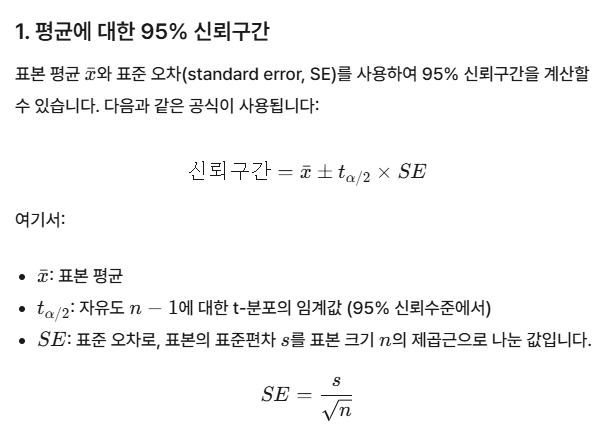

In [49]:
# 신뢰구간 계산
lower = round(mean - t_value * std / np.sqrt(n),3)
upper = round(mean + t_value * std / np.sqrt(n),3)
print(lower,upper)

168.321 171.553


## 3 그룹의 데이터에 대해 크루스칼-왈리스 검정을 사용하여 검정 통계량을 반올림하여 소숫점 이하 3자리까지 구하여라

In [50]:
import pandas as pd 
from scipy.stats import kruskal

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p3_2.csv')

a = df[df.ID =='A'].value.values
b = df[df.ID =='B'].value.values
c = df[df.ID =='C'].value.values

s,p = kruskal(a,b,c)

round_s = round(s,3)
print(round_s)

6.521


## 3 그룹의 데이터에 대해 크루스칼-왈리스 검정을 사용하여 p-value를 반올림하여 소숫점 이하 3자리까지 구하여라. 귀무가설과 대립가설중 0.05 유의수준에서 유의한 가설을 출력하라

In [51]:
round_p = round(p,3)
print(round_p)
print('대립')

0.038
대립


## 기타 다른 사이트

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro # 정규성 가정이 되어있으면 굳이 x

df = pd.read_csv("data/Titanic.csv")

#### 할당하는법
df['sex'] = df['sex'].map({'female': 1, 'male': 0})


# 혈압약을 먹기전과 먹기후 차이

# 정규성 검정
statistic, pvalue = stats.shapiro(df['after'] - df['before'])

# (정규성o) 대응표본 t 검정
statistic, pvalue = ttest_rel(df['after'],df['before'], alternative = 'two-sided') # 양측검정 two-sided

# (정규성x) wilcoxon 부호순위 검정
statistic, pvalue = stats.wilcoxon(df['after'],df['before'], alternative = 'two-sided')


# 혈압 먹은후 감소 했는지 확인하기 위해 쌍체 t검정
# 가설에 따라 alternative 값을 바꿔야함
# after- vefore < 0 'less'
# after - before > 0 'greater'

##### 독립표본 t 검정 #####
# 문제를 잘읽고 정규분포가정인지아닌지 확인할것
statistic, pvalue = stats.shapiro(df['A']) # A 집단 정규성 확인
statistic, pvalue = stats.shapiro(df['B']) # B 집단 정규성 확인

# or print(stats.shaprio(df['A'])

# 등분산 검정 필요
statistic, pvalue = stats.bartlett(df['A'],df['B'])

# 등분산 O 
statistic, pvalue = stats.ttest_ind (df['A'],df['B'],
										equal_var =True, #등분산가정
										alternative = 'two-sided')

# 만약 정규성 x 윌콕슨 순위합 stats.ranksums

###### anova 검정 (정규성 o) #####
statistic, pvalue = stats.bartlett(df['A'],....) # 등분산성
statistic, pvalue = stats.f_oneway(df['A'],......) # anova

# 정규성 앙닌경우 kruskal


###### 카이제곱 검정 ######
from scipy.stats import chisquare
stats, pvalue = chisquare(f_obs = , f_exp= ) # 관측값, 기대값

f_obs = [30,20,15,35] # 관측값
f_exp = [25,25,25,25]  # 모두 동일한 비율시 100/4

#비율이 문제에 주어져있는경우 a:30 b:50 c:10 d: 10
a = 100*0.3
b = 100*0.6
c = 100*0.1
d = 100*0.1
f_exp = [a,b,c,d]


##### 독립성 검정 ######
# 데이터에 따라 교차표를 만들것
# 연령대 별로 아이스크림 차이있는지
from scipy.stats import chi2_contingency
data = pd.crosstab(df['Gender'],df['Survived']) # index, col
statistic, pvalue, dof, expected = chi2_contingency(data) # dof 자유도, expected 기대값

print(statistic)
print(round(pvalue,3))


######## 다중회귀분석 ##########
from sklearn.linear_model from LinearRegression
model = LinearRegression()
X = df[['Gender','SibSp','Parch','Fare']]
Y = df['target']
model.fit(x, y)
print(np.round(model.coef_, 2))

######## 로지스틱 회귀분석 ########333
from statsmodels.formula.api import logit
formula = "Survived ~ Gender + SibSp + Parch + Fare"
model = logit(formula, data = df).fit()
print(model.params) # parch 의 계수갑 -0.201
print(np.exp(-0.353892)) # sibsp의 오즈비 문제